In [1]:
# Importing all relevant libraies that will be used for modeling and visualations
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, precision_score, plot_roc_curve, recall_score, f1_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imPipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

In [2]:
# Import saved datasets after EDA and pre-processing
X_train_KNNI = pd.read_csv("data/X_train_KNNI.csv", index_col=0)
X_test_KNNI = pd.read_csv("data/X_test_KNNI.csv", index_col=0)
y_test = pd.read_csv("data/y_test.csv", index_col=0)
y_train = pd.read_csv("data/y_train.csv", index_col=0)

In [3]:
# Define function to return score metrics
def model_metrics(model, X_train, y_train, X_test, y_test, name):
    
    # calculate training data metrics
    y_train_pred = model.predict(X_train)
    accuracy_train = round(accuracy_score(y_train, y_train_pred), 3)
    recall_train = round(recall_score(y_train, y_train_pred), 3)
    precision_train = round(precision_score(y_train, y_train_pred), 3)
    f1_train = round(f1_score(y_train, y_train_pred), 3)
    cv = round(cross_val_score(model, X_train, y_train).mean(), 3)
    
    # calculate test data metrics
    y_test_pred = model.predict(X_test)
    accuracy_test = round(accuracy_score(y_test, y_test_pred), 3)
    recall_test = round(recall_score(y_test, y_test_pred), 3)
    precision_test = round(precision_score(y_test, y_test_pred), 3)
    f1_test = round(f1_score(y_test, y_test_pred), 3)
    
    # print metrics
    print(f"""
    {name} Model Training Metrics:
    Accuracy Score: {accuracy_train}
    Recall Score: {recall_train}
    Precision Score: {precision_train}
    F1 Score: {f1_train}
    Cross Validation Score: {cv}
    ------
    {name} Model Test Metrics:
    Accuracy Score: {accuracy_test}
    Recall Score: {recall_test}
    Precision Score: {precision_test}
    F1 Score: {f1_test}
    """)
    
    # plot confusion matrices & roc curves
    print(f"{name} Model Training Confusion Matrix")
    plt.show(plot_confusion_matrix(model, X_train, y_train, cmap='rocket'))
    print(f"{name} Model Training ROC Curve")
    plt.show(plot_roc_curve(model, X_train, y_train))
    print(f"{name} Model Test Confusion Matrix")
    plt.show(plot_confusion_matrix(model, X_test, y_test, cmap='rocket'))
    print(f"{name} Model Test ROC Curve")
    plt.show(plot_roc_curve(model, X_test, y_test))

In [4]:
# Dummy Classifier Model
baseline = DummyClassifier(random_state=42)
baseline.fit(X_train_KNNI, y_train)

C:\Users\steve\anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


DummyClassifier(random_state=42)

C:\Users\steve\anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "



    Dummy Model Training Metrics:
    Accuracy Score: 0.667
    Recall Score: 0.206
    Precision Score: 0.206
    F1 Score: 0.206
    Cross Validation Score: 0.669
    ------
    Dummy Model Test Metrics:
    Accuracy Score: 0.668
    Recall Score: 0.201
    Precision Score: 0.201
    F1 Score: 0.201
    
Dummy Model Training Confusion Matrix


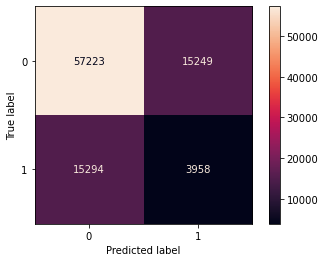

Dummy Model Training ROC Curve


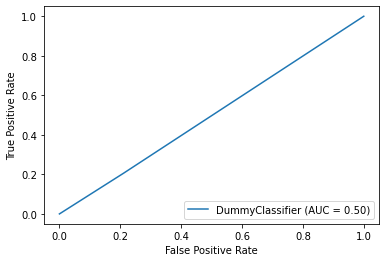

Dummy Model Test Confusion Matrix


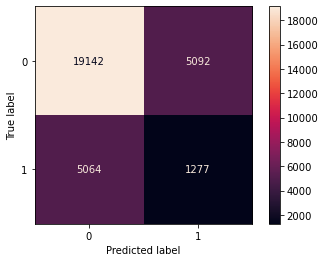

Dummy Model Test ROC Curve


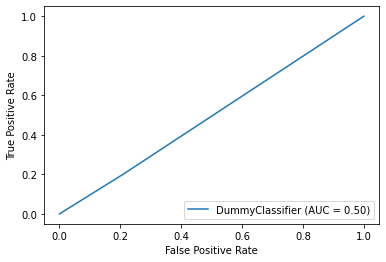

In [5]:
model_metrics(baseline, X_train_KNNI, np.ravel(y_train), X_test_KNNI, y_test, 'Dummy')

In [6]:
# Logistic Regression Pipeline
lr_pipe = imPipeline(steps=[
                        ('scaler', StandardScaler()),
                        ('smote', SMOTE()),
                        ('lr', LogisticRegression(random_state=42))])

lr_grid = {'lr__tol':[.01, .0001],
           'lr__C':[10, 1, .1],
           'lr__class_weight':[None, 'balanced']}

In [7]:
lr_gs = GridSearchCV(estimator=lr_pipe, 
                    param_grid=lr_grid,
                    verbose=2)

lr_gs.fit(X_train_KNNI, np.ravel(y_train))

lr_best = lr_gs.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] lr__C=10, lr__class_weight=None, lr__tol=0.01 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .... lr__C=10, lr__class_weight=None, lr__tol=0.01, total= 1.8min
[CV] lr__C=10, lr__class_weight=None, lr__tol=0.01 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min remaining:    0.0s


[CV] .... lr__C=10, lr__class_weight=None, lr__tol=0.01, total= 2.9min
[CV] lr__C=10, lr__class_weight=None, lr__tol=0.01 ...................
[CV] .... lr__C=10, lr__class_weight=None, lr__tol=0.01, total= 2.8min
[CV] lr__C=10, lr__class_weight=None, lr__tol=0.01 ...................
[CV] .... lr__C=10, lr__class_weight=None, lr__tol=0.01, total= 3.0min
[CV] lr__C=10, lr__class_weight=None, lr__tol=0.01 ...................
[CV] .... lr__C=10, lr__class_weight=None, lr__tol=0.01, total= 2.8min
[CV] lr__C=10, lr__class_weight=None, lr__tol=0.0001 .................
[CV] .. lr__C=10, lr__class_weight=None, lr__tol=0.0001, total= 2.7min
[CV] lr__C=10, lr__class_weight=None, lr__tol=0.0001 .................
[CV] .. lr__C=10, lr__class_weight=None, lr__tol=0.0001, total= 2.6min
[CV] lr__C=10, lr__class_weight=None, lr__tol=0.0001 .................
[CV] .. lr__C=10, lr__class_weight=None, lr__tol=0.0001, total= 2.6min
[CV] lr__C=10, lr__class_weight=None, lr__tol=0.0001 .................
[CV] .

[CV]  lr__C=0.1, lr__class_weight=balanced, lr__tol=0.0001, total= 1.5min


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed: 118.9min finished


In [8]:
lr_best = lr_gs.best_estimator_

In [9]:
lr_best

Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE()),
                ('lr',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    random_state=42))])


    LogRegBest Model Training Metrics:
    Accuracy Score: 0.785
    Recall Score: 0.768
    Precision Score: 0.492
    F1 Score: 0.6
    Cross Validation Score: 0.784
    ------
    LogRegBest Model Test Metrics:
    Accuracy Score: 0.787
    Recall Score: 0.766
    Precision Score: 0.491
    F1 Score: 0.599
    
LogRegBest Model Training Confusion Matrix


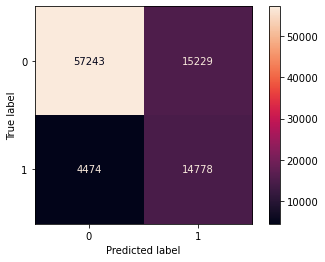

LogRegBest Model Training ROC Curve


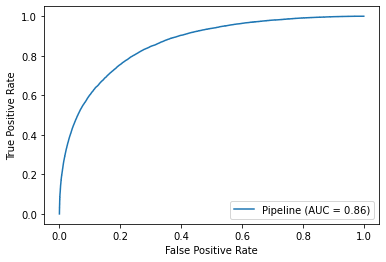

LogRegBest Model Test Confusion Matrix


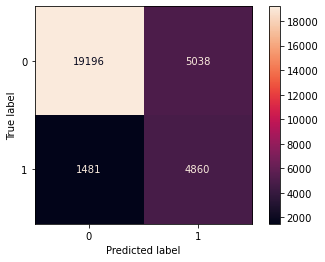

LogRegBest Model Test ROC Curve


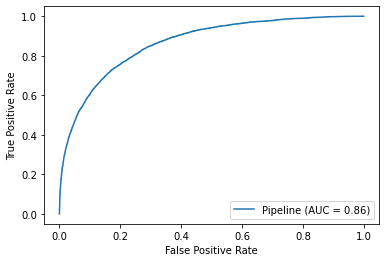

In [10]:
model_metrics(lr_best, X_train_KNNI, np.ravel(y_train), X_test_KNNI, y_test, 'LogRegBest')

In [11]:
# Decision Tree Pipeline
dt_pipe = Pipeline(steps=[('dt', DecisionTreeClassifier(random_state=42))])

dt_grid = {'dt__max_depth': [5, 7, 9],
        'dt__min_samples_split': [2, 5],
        'dt__min_samples_leaf': [1, 5]}

In [12]:
dt_gs = GridSearchCV(estimator=dt_pipe,
                    param_grid=dt_grid,
                    verbose=2,
                    cv=3)

dt_gs.fit(X_train_KNNI, np.ravel(y_train))

dt_best = dt_gs.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] dt__max_depth=5, dt__min_samples_leaf=1, dt__min_samples_split=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  dt__max_depth=5, dt__min_samples_leaf=1, dt__min_samples_split=2, total=   0.4s
[CV] dt__max_depth=5, dt__min_samples_leaf=1, dt__min_samples_split=2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  dt__max_depth=5, dt__min_samples_leaf=1, dt__min_samples_split=2, total=   0.4s
[CV] dt__max_depth=5, dt__min_samples_leaf=1, dt__min_samples_split=2 
[CV]  dt__max_depth=5, dt__min_samples_leaf=1, dt__min_samples_split=2, total=   0.4s
[CV] dt__max_depth=5, dt__min_samples_leaf=1, dt__min_samples_split=5 
[CV]  dt__max_depth=5, dt__min_samples_leaf=1, dt__min_samples_split=5, total=   0.4s
[CV] dt__max_depth=5, dt__min_samples_leaf=1, dt__min_samples_split=5 
[CV]  dt__max_depth=5, dt__min_samples_leaf=1, dt__min_samples_split=5, total=   0.4s
[CV] dt__max_depth=5, dt__min_samples_leaf=1, dt__min_samples_split=5 
[CV]  dt__max_depth=5, dt__min_samples_leaf=1, dt__min_samples_split=5, total=   0.4s
[CV] dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=2 
[CV]  dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=2, total=   0.4s
[CV] dt__max_depth=5, dt__min_samples_leaf=5, dt__min_samples_split=2 
[CV]  dt__max_depth=5, dt__min_samples_leaf=5, dt__min_sam

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   22.4s finished


In [39]:
dt_gs.best_estimator_

Pipeline(steps=[('dt', DecisionTreeClassifier(max_depth=7, random_state=42))])

In [45]:
treemodel = DecisionTreeClassifier(max_depth=7, random_state=42)
treemodel.fit(X_train_KNNI, np.ravel(y_train))

DecisionTreeClassifier(max_depth=7, random_state=42)

In [56]:
my_list = X_test_KNNI.columns.values.tolist()

In [58]:
my_list[39]

'Location_MountGinini'

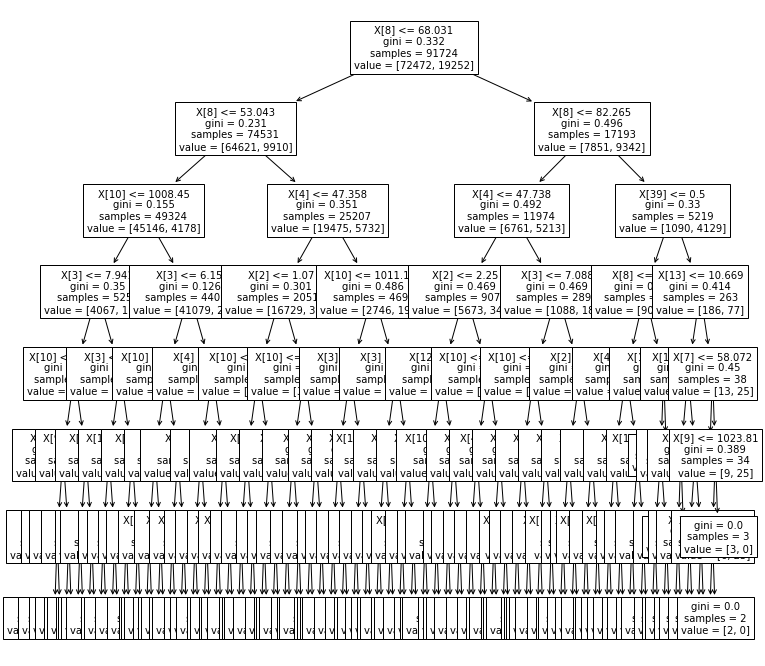

In [47]:
plt.figure(figsize=(12,12))  # set plot size (denoted in inches)
plot_tree(treemodel, fontsize=10)
plt.show()

In [13]:
dt_best

Pipeline(steps=[('dt', DecisionTreeClassifier(max_depth=7, random_state=42))])


    DecTreeBest Model Training Metrics:
    Accuracy Score: 0.846
    Recall Score: 0.428
    Precision Score: 0.727
    F1 Score: 0.539
    Cross Validation Score: 0.84
    ------
    DecTreeBest Model Test Metrics:
    Accuracy Score: 0.844
    Recall Score: 0.422
    Precision Score: 0.707
    F1 Score: 0.528
    
DecTreeBest Model Training Confusion Matrix


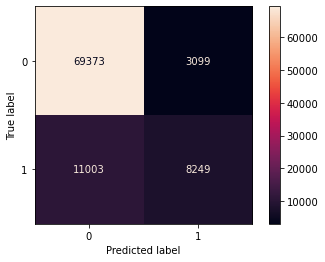

DecTreeBest Model Training ROC Curve


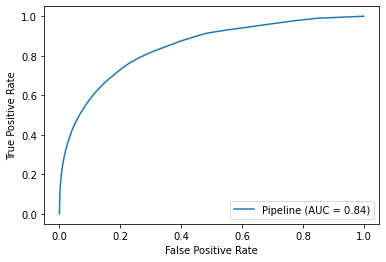

DecTreeBest Model Test Confusion Matrix


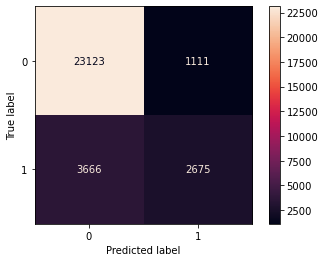

DecTreeBest Model Test ROC Curve


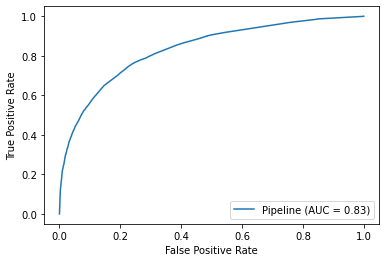

In [14]:
model_metrics(dt_best, X_train_KNNI, np.ravel(y_train), X_test_KNNI, y_test, 'DecTreeBest')

## Advanced Models

In [15]:
# Random Forest Pipeline
rf_pipe = Pipeline(steps=[('rf', RandomForestClassifier(random_state=42))])

rf_grid = {'rf__max_depth': [5, 7, 9],
          'rf__min_samples_split': [2, 5],
          'rf__min_samples_leaf': [1, 5]}

rf_gs = GridSearchCV(estimator=rf_pipe,
                    param_grid=rf_grid,
                    verbose=2,
                    cv=3)

rf_gs.fit(X_train_KNNI, np.ravel(y_train))

rf_best = rf_gs.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] rf__max_depth=5, rf__min_samples_leaf=1, rf__min_samples_split=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  rf__max_depth=5, rf__min_samples_leaf=1, rf__min_samples_split=2, total=   3.1s
[CV] rf__max_depth=5, rf__min_samples_leaf=1, rf__min_samples_split=2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV]  rf__max_depth=5, rf__min_samples_leaf=1, rf__min_samples_split=2, total=   3.1s
[CV] rf__max_depth=5, rf__min_samples_leaf=1, rf__min_samples_split=2 
[CV]  rf__max_depth=5, rf__min_samples_leaf=1, rf__min_samples_split=2, total=   3.1s
[CV] rf__max_depth=5, rf__min_samples_leaf=1, rf__min_samples_split=5 
[CV]  rf__max_depth=5, rf__min_samples_leaf=1, rf__min_samples_split=5, total=   3.1s
[CV] rf__max_depth=5, rf__min_samples_leaf=1, rf__min_samples_split=5 
[CV]  rf__max_depth=5, rf__min_samples_leaf=1, rf__min_samples_split=5, total=   3.1s
[CV] rf__max_depth=5, rf__min_samples_leaf=1, rf__min_samples_split=5 
[CV]  rf__max_depth=5, rf__min_samples_leaf=1, rf__min_samples_split=5, total=   3.1s
[CV] rf__max_depth=5, rf__min_samples_leaf=5, rf__min_samples_split=2 
[CV]  rf__max_depth=5, rf__min_samples_leaf=5, rf__min_samples_split=2, total=   3.1s
[CV] rf__max_depth=5, rf__min_samples_leaf=5, rf__min_samples_split=2 
[CV]  rf__max_depth=5, rf__min_samples_leaf=5, rf__min_sam

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  2.6min finished


In [16]:
rf_best

Pipeline(steps=[('rf', RandomForestClassifier(max_depth=9, random_state=42))])


    RanForBest Model Training Metrics:
    Accuracy Score: 0.848
    Recall Score: 0.351
    Precision Score: 0.828
    F1 Score: 0.493
    Cross Validation Score: 0.841
    ------
    RanForBest Model Test Metrics:
    Accuracy Score: 0.843
    Recall Score: 0.337
    Precision Score: 0.786
    F1 Score: 0.472
    
RanForBest Model Training Confusion Matrix


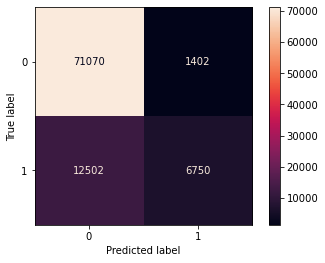

RanForBest Model Training ROC Curve


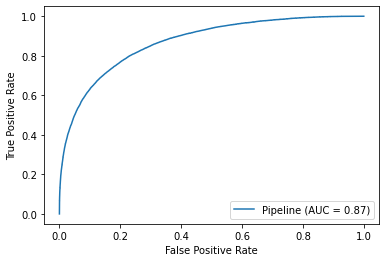

RanForBest Model Test Confusion Matrix


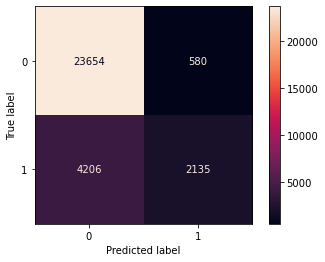

RanForBest Model Test ROC Curve


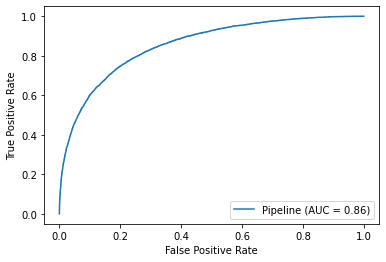

In [17]:
model_metrics(rf_best, X_train_KNNI, np.ravel(y_train), X_test_KNNI, y_test, 'RanForBest')

In [18]:
gbc_pipe = Pipeline(steps=[('gbc', GradientBoostingClassifier(random_state=42))])

gbc_grid = {'gbc__learning_rate': [.1, .3, .5],
           'gbc__min_samples_split': [2, 5],
           'gbc__min_samples_leaf': [1, 5]}

In [19]:
gbc_gs = GridSearchCV(estimator=gbc_pipe,
                    param_grid=gbc_grid,
                    verbose=2,
                    cv=3)

gbc_gs.fit(X_train_KNNI, np.ravel(y_train))

gbc_best = gbc_gs.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] gbc__learning_rate=0.1, gbc__min_samples_leaf=1, gbc__min_samples_split=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  gbc__learning_rate=0.1, gbc__min_samples_leaf=1, gbc__min_samples_split=2, total=  20.3s
[CV] gbc__learning_rate=0.1, gbc__min_samples_leaf=1, gbc__min_samples_split=2 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.2s remaining:    0.0s


[CV]  gbc__learning_rate=0.1, gbc__min_samples_leaf=1, gbc__min_samples_split=2, total=  19.9s
[CV] gbc__learning_rate=0.1, gbc__min_samples_leaf=1, gbc__min_samples_split=2 
[CV]  gbc__learning_rate=0.1, gbc__min_samples_leaf=1, gbc__min_samples_split=2, total=  20.0s
[CV] gbc__learning_rate=0.1, gbc__min_samples_leaf=1, gbc__min_samples_split=5 
[CV]  gbc__learning_rate=0.1, gbc__min_samples_leaf=1, gbc__min_samples_split=5, total=  20.0s
[CV] gbc__learning_rate=0.1, gbc__min_samples_leaf=1, gbc__min_samples_split=5 
[CV]  gbc__learning_rate=0.1, gbc__min_samples_leaf=1, gbc__min_samples_split=5, total=  20.0s
[CV] gbc__learning_rate=0.1, gbc__min_samples_leaf=1, gbc__min_samples_split=5 
[CV]  gbc__learning_rate=0.1, gbc__min_samples_leaf=1, gbc__min_samples_split=5, total=  19.9s
[CV] gbc__learning_rate=0.1, gbc__min_samples_leaf=5, gbc__min_samples_split=2 
[CV]  gbc__learning_rate=0.1, gbc__min_samples_leaf=5, gbc__min_samples_split=2, total=  20.0s
[CV] gbc__learning_rate=0.1, g

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed: 11.9min finished


In [28]:
gbc_gs.best_estimator_

Pipeline(steps=[('gbc',
                 GradientBoostingClassifier(learning_rate=0.3,
                                            min_samples_leaf=5,
                                            random_state=42))])

In [34]:
Treemodel = GradientBoostingClassifier(learning_rate=0.3,
                                            min_samples_leaf=5,
                                            random_state=42)
Treemodel.fit(X_train_KNNI, np.ravel(y_train))

GradientBoostingClassifier(learning_rate=0.3, min_samples_leaf=5,
                           random_state=42)

In [25]:
from sklearn.tree import plot_tree

In [37]:
pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24572 sha256=aa7abaf117bd4be975c8c7d7e72e3c28d55bb93a0b5d5e6703cca081844ecd56

  Stored in directory: c:\users\steve\appdata\local\pip\cache\wheels\fe\cd\78\a7e873cc049759194f8271f780640cf96b35e5a48bef0e2f36
Successfully built pydotplus


In [38]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz
import numpy as np

# Get the tree number 42
sub_tree_42 = Treemodel.estimators_[42, 0]

# Visualization. Install graphviz in your system
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(
    sub_tree_42,
    out_file=None, filled=True, rounded=True,
    special_characters=True,
    proportion=False, impurity=False, # enable them if you want
)
graph = graph_from_dot_data(dot_data)
Image(graph.create_png())

InvocationException: GraphViz's executables not found


    GBCBest Model Training Metrics:
    Accuracy Score: 0.861
    Recall Score: 0.502
    Precision Score: 0.754
    F1 Score: 0.602
    Cross Validation Score: 0.854
    ------
    GBCBest Model Test Metrics:
    Accuracy Score: 0.856
    Recall Score: 0.492
    Precision Score: 0.724
    F1 Score: 0.585
    
GBCBest Model Training Confusion Matrix


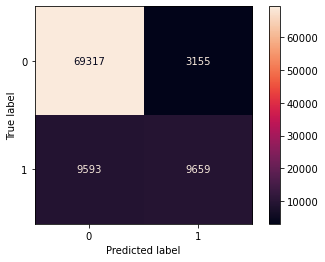

GBCBest Model Training ROC Curve


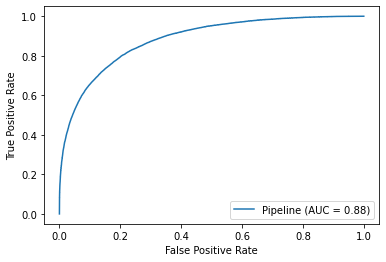

GBCBest Model Test Confusion Matrix


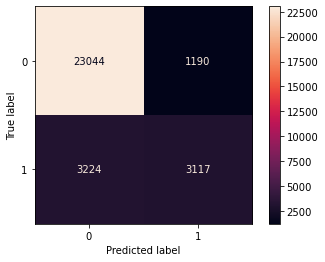

GBCBest Model Test ROC Curve


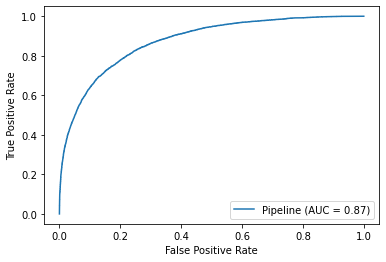

In [27]:
model_metrics(gbc_best, X_train_KNNI, np.ravel(y_train), X_test_KNNI, y_test, 'GBCBest')

In [ ]:
xgb_pipe = Pipeline(steps=[('xgb', XGBClassifier(objective='binary:logistic', random_state=42))])

xgb_grid = {'xgb__max_depth': [6,8,10],
           'xgb__tree_method': ['auto','hist'],
           'xgb__learning_rate': [.1, .3, .5]}

In [ ]:
xgb_gs = GridSearchCV(estimator=xgb_pipe,
                    param_grid=xgb_grid,
                    verbose=2,
                    cv=3)

xgb_gs.fit(X_train_KNNI, np.ravel(y_train))

xgb_best = xgb_gs.best_estimator_

In [ ]:
xgb_best

In [ ]:
model_metrics(xgb_best, X_train_KNNI, np.ravel(y_train), X_test_KNNI, y_test, 'XGBBest')

In [ ]:
xgb2_pipe = Pipeline(steps=[('xgb2', XGBClassifier(objective='binary:logistic', random_state=42, learning_rate=0.1, tree_method='hist'))])

xgb2_grid = {'xgb2__max_depth': [3, 5, 8],
           'xgb2__colsample_bytree': [.3, .5, .8, 1],
             'xgb2__subsample': [.3, .5, .8, 1]}

In [ ]:
xgb2_gs = GridSearchCV(estimator=xgb2_pipe,
                    param_grid=xgb2_grid,
                    verbose=2,
                    cv=3)

xgb2_gs.fit(X_train_KNNI, np.ravel(y_train))

xgb2_best = xgb2_gs.best_estimator_

In [ ]:
xgb2_best = XGBClassifier(objective='binary:logistic', random_state=42, )

In [ ]:
model_metrics(xgb2_best, X_train_KNNI, np.ravel(y_train), X_test_KNNI, y_test, 'XGB2Best')

In [48]:
from xgboost import plot_tree

In [49]:
plot_tree(xgb2_best)

NameError: name 'xgb2_best' is not defined

In [59]:
sns.boxplot(x="day", y="total_bill",
            hue="smoker", palette=["m", "g"],
            data=X_test_KNNI)
sns.despine(offset=10, trim=True)

ValueError: Could not interpret input 'day'